# Example Usage of `generate_land_sea_mask`

## Generate land sea mask for a grid

In [1]:
from pcmdi_utils import generate_land_sea_mask

In [2]:
import xcdat as xc

### Make a target grid

In [4]:
target_grid = xc.create_uniform_grid(-90, 90, 1.0, 0, 359, 1.0)

### Generate land sea mask field, using `pcmdi` method ([Karl and Doutiaux 2000, PCMDI report 58](http://www-pcmdi.llnl.gov/publications/pdf/58.pdf))

In [5]:
%%time
mask1 = generate_land_sea_mask(target_grid, tool='pcmdi')

CPU times: user 51.3 s, sys: 3.57 s, total: 54.9 s
Wall time: 57 s


In [6]:
mask1

<xarray.DataArray 'lsmask' (lat: 181, lon: 360)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0

### Generate land sea mask field, based on [`global-land-mask`](https://pypi.org/project/global-land-mask/) package

In [7]:
%%time
mask2 = generate_land_sea_mask(target_grid, tool='global_land_mask')

CPU times: user 52.8 ms, sys: 24.9 ms, total: 77.7 ms
Wall time: 77.7 ms


In [8]:
mask2

<xarray.DataArray 'lsmask' (lat: 181, lon: 360)>
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

## Visual examination

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def korea(d):
    lat1 = 30
    lat2 = 46
    lon1 = 120
    lon2 = 135
    return region(d,  lat1, lat2, lon1, lon2)


def conus(d):
    lat1 = 30
    lat2 = 50
    lon1 = 235
    lon2 = 300
    return region(d,  lat1, lat2, lon1, lon2)


def region(d, lat1, lat2, lon1, lon2):   
    lon_max = np.max(d.lon.values)
    lon_min = np.min(d.lon.values)
    
    if lon_max <= 180 and lon_min < 0:
        if lon1 > 180:
            lon1 = lon1 - 360
        if lon2 > 180:
            lon2 = lon2 - 360
    
    return d.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))
    
    
def plot(d1, d2, title=None):
    fig, ax = plt.subplots(3, 3, figsize=(15, 10))
    for r in range(0,3):
        if r == 0:
            d1s, d2s = d1, d2
        elif r == 1:
            d1s, d2s = conus(d1), conus(d2)
        elif r == 2:
            d1s, d2s = korea(d1), korea(d2)
        d1s.plot(ax=ax[r][0])
        d2s.plot(ax=ax[r][1])
        (d1s-d2s).plot(ax=ax[r][2])

        if r == 0:
            ax[r][0].set_title('PCMDI')
            ax[r][1].set_title('GLOBAL_LAND_MASK')
            ax[r][2].set_title('DIFF: PCMDI - GLOBAL_LAND_MASK')
    
    fig.tight_layout()

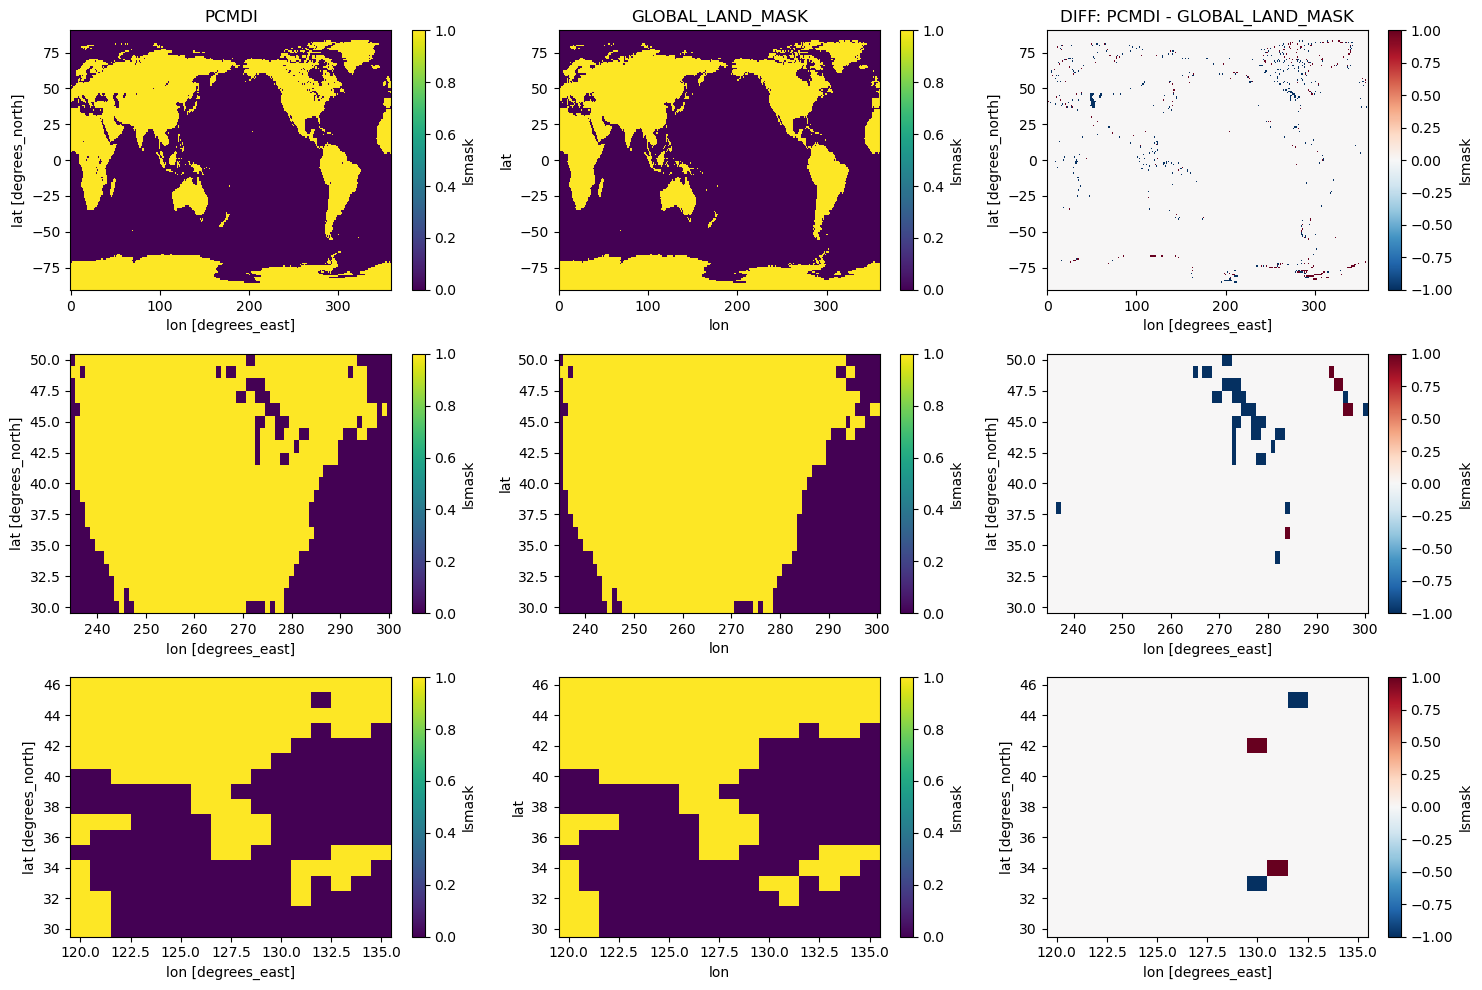

In [10]:
plot(mask1,mask2)

## Generate land sea mask for demo data and apply it

In [13]:
import os

data_path = "/Users/lee1043/Documents/Research/git/pcmdi_metrics_20221013_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_data/CMIP5_demo_timeseries/historical/atmos/day/pr"
nc_file_name = "pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc"
path = os.path.join(data_path, nc_file_name)

In [14]:
ds = xc.open_mfdataset(path)

In [21]:
mask = generate_land_sea_mask(ds)

In [26]:
ds_land = ds.where(mask==1)
ds_sea = ds.where(mask==0)

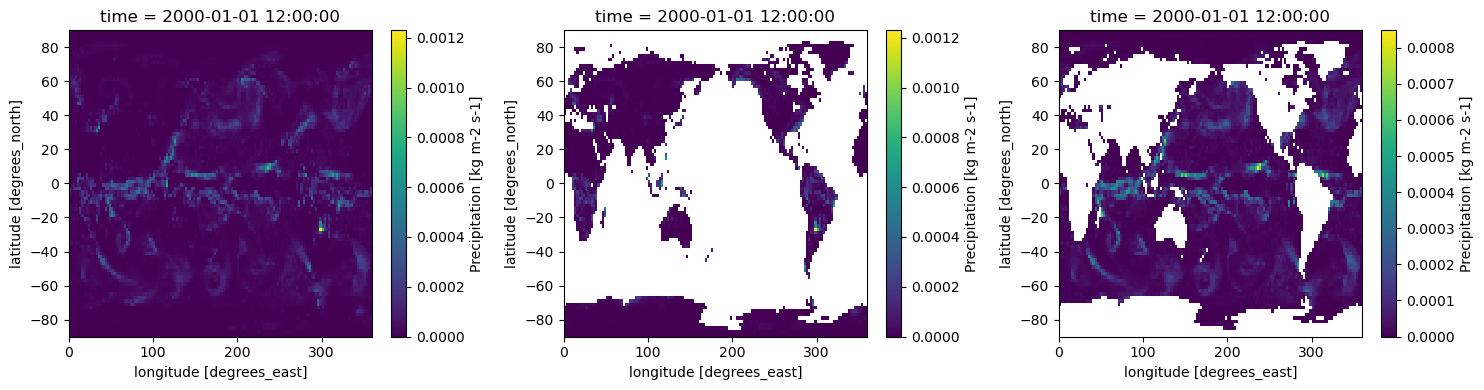

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ds.isel(time=0)['pr'].plot(ax=ax[0])
ds_land.isel(time=0)['pr'].plot(ax=ax[1])
ds_sea.isel(time=0)['pr'].plot(ax=ax[2])

fig.tight_layout()